In [1]:

#librerias de manejo de datos

import pandas as pd
import numpy as np


#Modelos

from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge


#librerias de visualización
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes
from matplotlib import style
import matplotlib.ticker as ticker


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline


# Selección de las variables por típo
# ==============================================================================
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RepeatedKFold

from sklearn import metrics
from sklearn.model_selection import validation_curve

from sklearn.metrics import mean_squared_error
#otros
import multiprocessing
import warnings
warnings.filterwarnings('ignore')
from fitter import Fitter, get_common_distributions

## Importar Datos Modelo ##

In [2]:
libro="modelo.xlsx"
datos=pd.read_excel(libro,sheet_name='Andres Sabella')
x=datos[["Ubicación","Factor Sección Característica","Tipo Pavimento","Área (m2)","NOMENCLATURA","EDAD PAVIMENTO","PCI","DELTA PCI","CARGA ACUMULADA RUEDA SIMPLE","CARGA ACUMULADA RUEDA DOBLE","CARGA ACUMULADA RUEDA DOBLE TANDEM","CORREGIR EDAD-TRANSITO"]]
y=datos[["PCI OBJETIVO"]]
df=pd.DataFrame(x)
x=df.fillna("S-M") # No se emplea  

In [3]:
x.head()

,Ubicación,Factor Sección Característica,Tipo Pavimento,Área (m2),NOMENCLATURA,EDAD PAVIMENTO,PCI,DELTA PCI,CARGA ACUMULADA RUEDA SIMPLE,CARGA ACUMULADA RUEDA DOBLE,CARGA ACUMULADA RUEDA DOBLE TANDEM,CORREGIR EDAD-TRANSITO
0,Pista,Sector central de pista,Asfalto,1760,ACPC,7,83,0,0.01424,4.440,4.726226,0
1,Pista,Sector central de pista,Asfalto,1760,ACPC,8,83,0,0.01602,4.995,5.321061,0
2,Pista,Sector central de pista,Asfalto,1760,ACPC,9,82,4,0.01780,5.550,5.917226,0
3,Pista,Sector central de pista,Asfalto,1760,ACPC,10,86,0,0.01958,6.105,6.514851,0
4,Pista,Sector central de pista,Asfalto,1760,ACPC,11,76,0,0.02136,6.660,7.114063,0


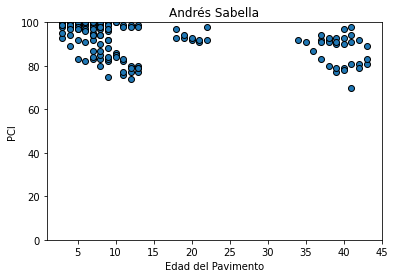

In [4]:
#plt.scatter(y_test,pr.predict(X_test))
fig, ax_0 = plt.subplots()
ax_0.scatter(x["EDAD PAVIMENTO"], x["PCI"], edgecolors=(0, 0, 0),label='')
#ax_0.plot([y_train.min(), y_train.max()], [0, 100], 'k--', lw=4)
ax_0.set_xlabel('Edad del Pavimento')
ax_0.set_ylabel('PCI')
plt.ylim(0,100)
ax_0.set_title('Andrés Sabella')

plt.show()

In [5]:
#FILTRAR DATOS DE ANALISIS DEJANDO FUERA A DATOS RELACIONADOS CON LA PLATAFORMA (PAVIMENTOS DE HORMIGÓN MÁS DE 40 AÑOS DE SERVICIO)

x=datos[["Ubicación","Factor Sección Característica","Tipo Pavimento","Área (m2)","NOMENCLATURA","EDAD PAVIMENTO","PCI","DELTA PCI","CARGA ACUMULADA RUEDA SIMPLE","CARGA ACUMULADA RUEDA DOBLE","CARGA ACUMULADA RUEDA DOBLE TANDEM","CORREGIR EDAD-TRANSITO",'PCI OBJETIVO',"OPERACIONES EQUIVALENTES"]]
#mask=x['Ubicación']!='Plataforma'
mask2=x['OPERACIONES EQUIVALENTES']>=0
#mask3=x["DELTA PCI"]==0
x=x[mask2]
y=x['PCI OBJETIVO']
x=x.drop('PCI OBJETIVO',axis=1)
x.head(10)

,Ubicación,Factor Sección Característica,Tipo Pavimento,Área (m2),NOMENCLATURA,EDAD PAVIMENTO,PCI,DELTA PCI,CARGA ACUMULADA RUEDA SIMPLE,CARGA ACUMULADA RUEDA DOBLE,CARGA ACUMULADA RUEDA DOBLE TANDEM,CORREGIR EDAD-TRANSITO,OPERACIONES EQUIVALENTES
0,Pista,Sector central de pista,Asfalto,1760,ACPC,7,83,0,0.01424,4.440,4.726226,0,5879.306174
1,Pista,Sector central de pista,Asfalto,1760,ACPC,8,83,0,0.01602,4.995,5.321061,0,6913.571975
2,Pista,Sector central de pista,Asfalto,1760,ACPC,9,82,4,0.01780,5.550,5.917226,0,8014.360560
3,Pista,Sector central de pista,Asfalto,1760,ACPC,10,86,0,0.01958,6.105,6.514851,0,9181.671930
4,Pista,Sector central de pista,Asfalto,1760,ACPC,11,76,0,0.02136,6.660,7.114063,0,10415.506083
5,Pista,Sector central de pista,Asfalto,1760,ACPC,12,74,3,0.02314,7.215,7.714992,0,11715.863021
6,Pista,Sector central de pista,Asfalto,1760,ACPC,13,77,0,0.02492,7.770,8.317767,0,13082.742743
7,Pista,Sectores de borde de pista,Asfalto,2240,ACPC,7,84,0,0.01424,4.440,4.726226,0,5879.306174
8,Pista,Sectores de borde de pista,Asfalto,2240,ACPC,8,80,0,0.01602,4.995,5.321061,0,6913.571975
9,Pista,Sectores de borde de pista,Asfalto,2240,ACPC,9,75,10,0.01780,5.550,5.917226,0,8014.360560


## Datos de Entradas ##

In [6]:
#TIPOS DE DATOS A ANALIZADOS
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 0 to 153
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Ubicación                           122 non-null    object 
 1   Factor Sección Característica       122 non-null    object 
 2   Tipo Pavimento                      122 non-null    object 
 3   Área (m2)                           122 non-null    int64  
 4   NOMENCLATURA                        122 non-null    object 
 5   EDAD PAVIMENTO                      122 non-null    int64  
 6   PCI                                 122 non-null    int64  
 7   DELTA PCI                           122 non-null    int64  
 8   CARGA ACUMULADA RUEDA SIMPLE        122 non-null    float64
 9   CARGA ACUMULADA RUEDA DOBLE         122 non-null    float64
 10  CARGA ACUMULADA RUEDA DOBLE TANDEM  122 non-null    float64
 11  CORREGIR EDAD-TRANSITO              122 non-n

In [7]:
#REVISAR SI HAY VALORES NULOS EN LOS DATOS ANALIZADOS
x.isna().sum().sort_values()

Ubicación                             0
Factor Sección Característica         0
Tipo Pavimento                        0
Área (m2)                             0
NOMENCLATURA                          0
EDAD PAVIMENTO                        0
PCI                                   0
DELTA PCI                             0
CARGA ACUMULADA RUEDA SIMPLE          0
CARGA ACUMULADA RUEDA DOBLE           0
CARGA ACUMULADA RUEDA DOBLE TANDEM    0
CORREGIR EDAD-TRANSITO                0
OPERACIONES EQUIVALENTES              0
dtype: int64

In [8]:
y.shape

(122,)

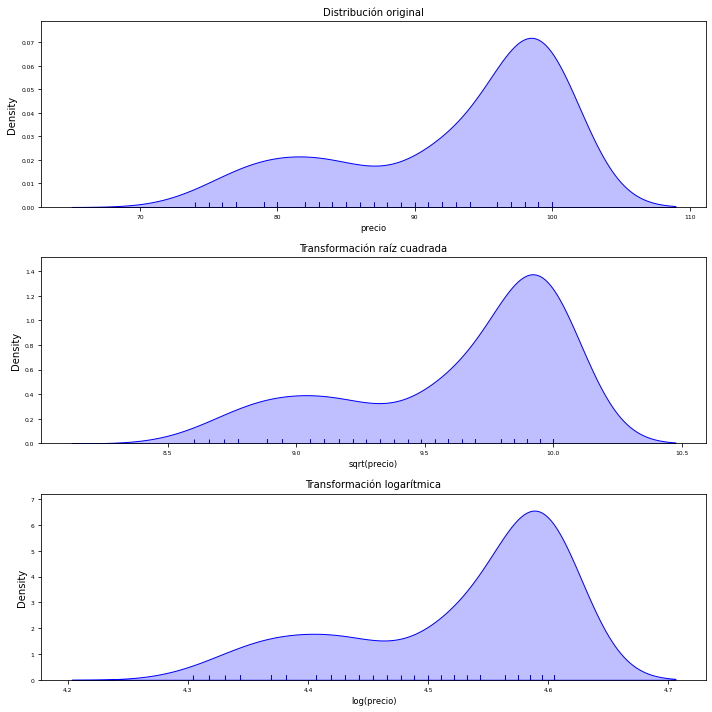

In [9]:
#ANALIZAR DISTRIBUCIÓN DE DATOS DE SALIDA

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))
sns.distplot(
    y,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('precio', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(y),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(precio)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.distplot(
    np.log(y),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(precio)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

In [10]:
#mejor ajuste regresión tipo beta

distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic']

fitter = Fitter(y, distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False).sort_values('sumsquare_error')

,sumsquare_error,aic,bic,kl_div
beta,0.810461,737.435638,-592.513108,inf
powerlaw,1.086914,763.842675,-561.510667,inf
cauchy,1.172399,920.802805,-557.078201,inf
logistic,1.260051,774.735287,-548.281941,inf
norm,1.270024,748.698652,-547.320145,inf
gamma,1.275452,747.349595,-541.995875,inf
chi2,1.278977,743.514087,-541.659090,inf
expon,1.346109,729.403938,-540.221865,inf
exponpow,1.718143,1075.794032,-505.646764,inf


In [11]:
# Variables numéricas
# ==============================================================================
x.select_dtypes(include=['float64', 'int64']).describe()

,Área (m2),EDAD PAVIMENTO,PCI,DELTA PCI,CARGA ACUMULADA RUEDA SIMPLE,CARGA ACUMULADA RUEDA DOBLE,CARGA ACUMULADA RUEDA DOBLE TANDEM,CORREGIR EDAD-TRANSITO,OPERACIONES EQUIVALENTES
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,12303.377049,8.524590,93.467213,0.311475,0.016954,5.286148,5.648465,0.032787,7925.068743
std,13642.304922,4.381051,7.493451,1.260211,0.007798,2.431483,2.590408,0.178813,2639.802006
min,1080.000000,3.000000,74.000000,0.000000,0.007120,2.220000,2.368609,0.000000,3471.835361
25%,2240.000000,6.000000,89.250000,0.000000,0.012460,3.885000,4.157234,0.000000,5879.306174
50%,5652.000000,8.000000,97.000000,0.000000,0.016020,4.995000,5.321061,0.000000,8008.035270
75%,14000.000000,10.000000,99.000000,0.000000,0.019580,6.105000,6.514851,0.000000,10314.086967
max,45093.000000,22.000000,100.000000,10.000000,0.040940,12.765000,13.608078,1.000000,13082.742743


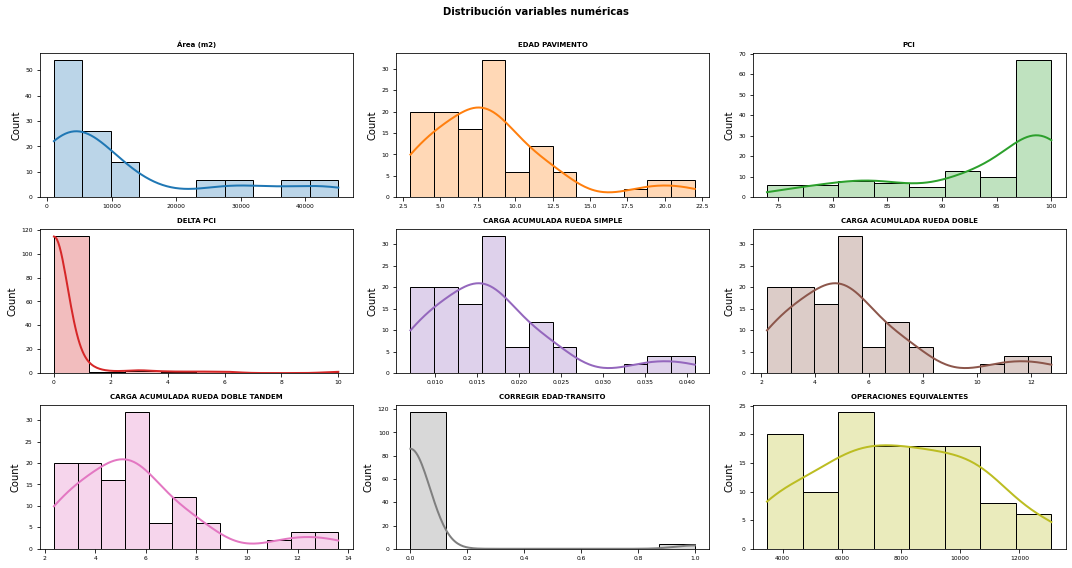

In [12]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 8))
axes = axes.flat
columnas_numeric = x.select_dtypes(include=['float64', 'int64']).columns
#columnas_numeric = columnas_numeric.drop('')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = x,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

La variable corregir EDAD-Tránsito debe ser dejada fuera del analisis dado que posee tan solo un valor numérico. Inicialmente fue creada para identificar los pavimentos de más de 40 años de edad y con valores de PCI sobre 80, por otro lado el modelo creado para predecir el tránsito acumulado fue creado a partir del año 2000 no prediciendo para años anteriores.

La variable delta PCI preferentemente es 0, para mejorar el modelo pudiesen crearse variables ficcticias para representar bien el fenomeno de intervención de los pavimentos. Generando una especie de balanceo de clases tal como ocurre en problemas de clasificación.


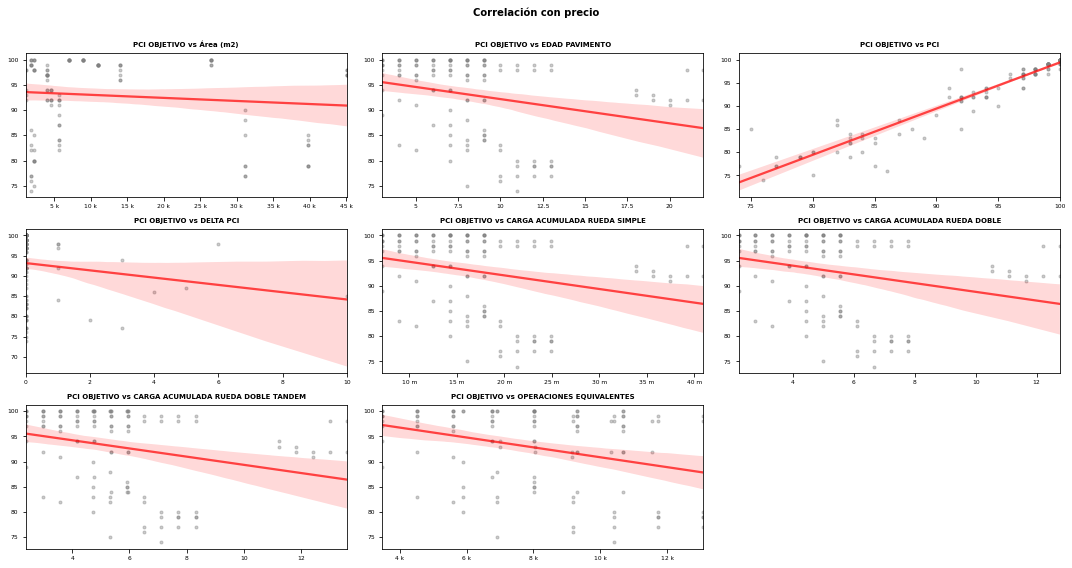

In [13]:
x
#Eliminar la variable CORREGIR EDAD-TRANSITO.
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 8))
axes = axes.flat

columnas_numeric = x.select_dtypes(include=['float64', 'int64']).columns
columnas_numeric = columnas_numeric.drop('CORREGIR EDAD-TRANSITO')
for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = x[colum],
        y           = y,
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i],
        #ci=None
    )
    axes[i].set_title(f"PCI OBJETIVO vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con precio', fontsize = 10, fontweight = "bold");






In [14]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)


In [15]:
x1=x.drop(['CARGA ACUMULADA RUEDA DOBLE', 'CARGA ACUMULADA RUEDA SIMPLE','CARGA ACUMULADA RUEDA DOBLE TANDEM','CORREGIR EDAD-TRANSITO'], axis=1)
x11=x1
corr_matrix1 = x1.select_dtypes(include=['float64', 'int64']).corr(method='pearson')
tidy_corr_matrix(corr_matrix1).head(10)


,variable_1,variable_2,r,abs_r
21,OPERACIONES EQUIVALENTES,EDAD PAVIMENTO,0.696274,0.696274
9,EDAD PAVIMENTO,OPERACIONES EQUIVALENTES,0.696274,0.696274
22,OPERACIONES EQUIVALENTES,PCI,-0.381410,0.381410
14,PCI,OPERACIONES EQUIVALENTES,-0.381410,0.381410
13,PCI,DELTA PCI,-0.348975,0.348975
17,DELTA PCI,PCI,-0.348975,0.348975
11,PCI,EDAD PAVIMENTO,-0.307603,0.307603
7,EDAD PAVIMENTO,PCI,-0.307603,0.307603
1,Área (m2),EDAD PAVIMENTO,-0.153000,0.153000
5,EDAD PAVIMENTO,Área (m2),-0.153000,0.153000


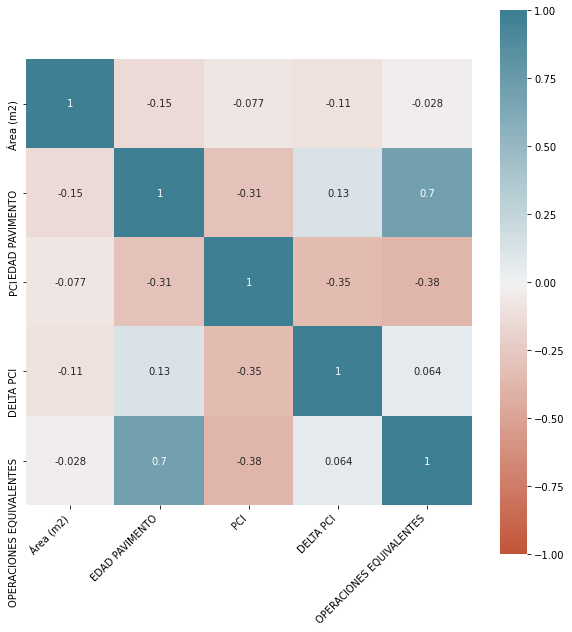

In [16]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

sns.heatmap(
    corr_matrix1,
    annot     = True,
    cbar      = True,
    annot_kws = {"size": 10},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

In [17]:
#DESCRIPCION VARIABLES CUALITATIVAS

# Variables cualitativas (tipo object)
# ==============================================================================
#x=x.drop('Tipo Pavimento',axis=1)
x.select_dtypes(include=['object']).describe()

,Ubicación,Factor Sección Característica,Tipo Pavimento,NOMENCLATURA
count,122,122,122,122
unique,4,4,2,3
top,Pista,Centro,Asfalto,ACPC
freq,70,42,112,77


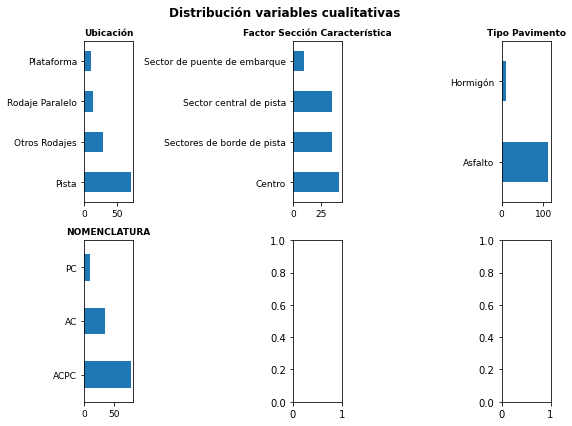

In [18]:
# Gráfico para cada variable cualitativa
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8, 6))
axes = axes.flat
columnas_object = x.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    x[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 9, fontweight = "bold")
    axes[i].tick_params(labelsize = 9)
    axes[i].set_xlabel("")


fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables cualitativas',
             fontsize = 12, fontweight = "bold");

## PREPROCESAMIENTO DE DATOS ## 


In [19]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(
                                        x1,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 43,
                                        shuffle      = True
                                    )
print("Partición de entrenamento")
print("-----------------------")
print(y_train1.describe())


print("Partición de test")
print("-----------------------")
print(y_test1.describe())


Partición de entrenamento
-----------------------
count     97.000000
mean      93.051546
std        7.870529
min       74.000000
25%       87.000000
50%       97.000000
75%       99.000000
max      100.000000
Name: PCI OBJETIVO, dtype: float64
Partición de test
-----------------------
count     25.000000
mean      92.320000
std        7.712112
min       79.000000
25%       86.000000
50%       96.000000
75%       99.000000
max      100.000000
Name: PCI OBJETIVO, dtype: float64


In [20]:

# Pipe: preprocesado

numeric_cols = X_train1.select_dtypes(include=['float64', 'int64']).columns.to_list()
cat_cols = X_train1.select_dtypes(include=['object', 'category']).columns.to_list()


preprocessor = ColumnTransformer(
                   [('scale', StandardScaler(), numeric_cols),
                    ('onehot', OneHotEncoder(drop='first'), cat_cols)],
                remainder='passthrough')

X_train1 = preprocessor.fit_transform(X_train1)
X_test1  = preprocessor.transform(X_test1)







## FEATURE SELECTION: SELECTKBEST

In [21]:
# Convertir el output en dataframe y añadir el nombre de las columnas
#==============================================================================
encoded_cat = preprocessor.named_transformers_['onehot'].get_feature_names(cat_cols)
labels = np.concatenate([numeric_cols, encoded_cat])
#datos_train_prep = preprocessor.transform(X_train1)
datos_train_prep = pd.DataFrame(X_train1, columns=labels)
datos_test_prep=pd.DataFrame(X_test1,columns=labels)

In [52]:
datos_train_prep.columns

Index(['Área (m2)', 'EDAD PAVIMENTO', 'PCI', 'DELTA PCI',
       'OPERACIONES EQUIVALENTES', 'Ubicación_Pista',
       'Ubicación_Rodaje Paralelo',
       'Factor Sección Característica_Sector central de pista',
       'Factor Sección Característica_Sector de puente de embarque',
       'Factor Sección Característica_Sectores de borde de pista',
       'NOMENCLATURA_ACPC'],
      dtype='object')

## FEATURE SELECTION: SELECTKBEST

In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression

# Aplicando el algoritmo univariante de prueba F.
k = 9  # número de atributos a seleccionar
#columnas = list(X_train1.columns.values)
seleccionadas = SelectKBest(mutual_info_regression, k=k).fit(datos_train_prep, y_train1)
selected_features_df = pd.DataFrame({'Feature':list(datos_train_prep.columns),
                                     'Scores MI':seleccionadas.scores_})
selected_features_df.sort_values(by='Scores MI', ascending=False)


,Feature,Scores MI
2,PCI,1.355301
0,Área (m2),0.799860
1,EDAD PAVIMENTO,0.285823
12,NOMENCLATURA_ACPC,0.252519
5,Ubicación_Pista,0.247632
8,Factor Sección Característica_Sector central d...,0.224494
13,NOMENCLATURA_PC,0.150436
9,Factor Sección Característica_Sector de puente...,0.143921
11,Tipo Pavimento_Hormigón,0.142822
6,Ubicación_Plataforma,0.141049


In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression

# Aplicando el algoritmo univariante de prueba F.
k = 9  # número de atributos a seleccionar
columnas = list(datos_train_prep.columns.values)
seleccionadas = SelectKBest(f_regression, k=k).fit(datos_train_prep, y_train1)
selected_features_df = pd.DataFrame({'Feature':list(datos_train_prep.columns),
                                     'Scores f':seleccionadas.scores_})
selected_features_df.sort_values(by='Scores f', ascending=False)

,Feature,Scores f
2,PCI,910.683167
12,NOMENCLATURA_ACPC,22.355657
4,OPERACIONES EQUIVALENTES,11.379051
1,EDAD PAVIMENTO,6.581377
7,Ubicación_Rodaje Paralelo,6.161280
0,Área (m2),2.440082
3,DELTA PCI,2.255620
5,Ubicación_Pista,1.852429
10,Factor Sección Característica_Sectores de bord...,0.799661
8,Factor Sección Característica_Sector central d...,0.336392


X_indices = np.arange(datos_train_prep.shape[-1])
scores = -np.log10(seleccionadas.pvalues_)
scores /= scores.max()
plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)')


In [25]:

from sklearn.feature_selection import RFECV
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

rfc = RandomForestRegressor(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=10, scoring='r2')
rfecv.fit(datos_train_prep, y_train1)




RFECV(cv=10, estimator=RandomForestRegressor(random_state=101), scoring='r2')

In [26]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 11


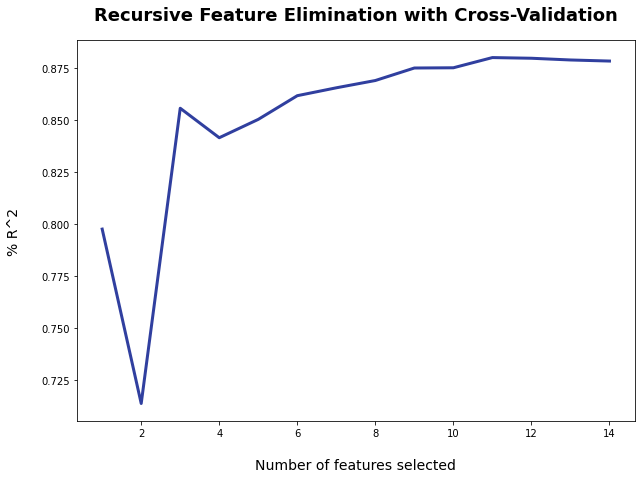

In [27]:
plt.figure(figsize=(10, 7))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% R^2', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [28]:
print(np.where(rfecv.support_ == False)[0])

datos_train_prep.drop(datos_train_prep.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)


[ 6 11 13]


In [29]:
sobrevivientes=datos_train_prep.columns
datos_test_prep=datos_test_prep[sobrevivientes]

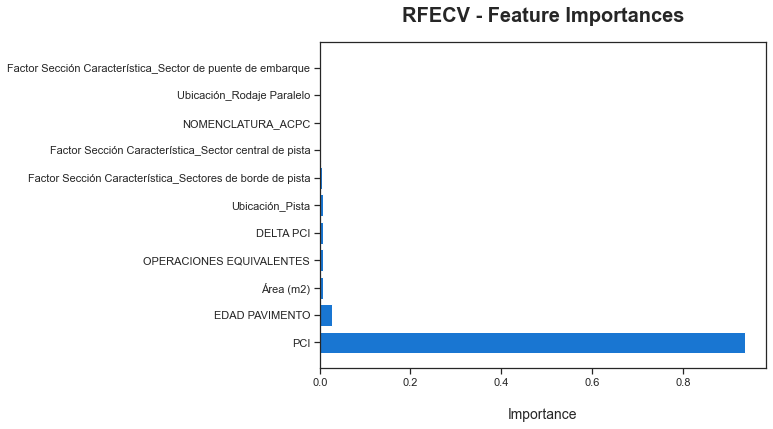

In [53]:
dset = pd.DataFrame()
dset['attr'] = datos_train_prep.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(8, 6))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [31]:
X_train1=datos_train_prep
X_test1=datos_test_prep

In [32]:
#Grid de hiperparámetros


param_grid1={'hidden_layer_sizes':[(10,),(10,10),(10,10,10),(50,)],
            'activation': ['relu'],
            'alpha': [5,50,100,500],
            'learning_rate': ['constant'],
            'solver': ['adam']}
                
#scoring = {'neg_mean_absolute_error': 'neg_mean_absolute_error', 'neg_root_mean_squared_error': 'mean_squared_error'}



# Búsqueda por validación cruzada

grid1 = GridSearchCV(
        estimator  = MLPRegressor() ,
        param_grid = param_grid1,
        n_jobs=-1,
        cv         = 5,                      #RepeatedKFold(n_splits = 3, n_repeats = 5), 
        verbose    = 0,
        return_train_score = True
       )



_=grid1.fit(X=X_train1, y=y_train1)


In [33]:
results=grid1.cv_results_

In [34]:
results.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_activation', 'param_alpha', 'param_hidden_layer_sizes', 'param_learning_rate', 'param_solver', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [35]:
# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid1.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)


,param_activation,param_alpha,param_hidden_layer_sizes,param_learning_rate,param_solver,mean_test_score,std_test_score,mean_train_score,std_train_score
6,relu,50,"(10, 10, 10)",constant,adam,-75.889617,25.191025,-69.304491,22.741039
2,relu,5,"(10, 10, 10)",constant,adam,-78.858494,18.356422,-69.815533,17.619187
14,relu,500,"(10, 10, 10)",constant,adam,-102.805004,23.142099,-94.940712,18.125882
10,relu,100,"(10, 10, 10)",constant,adam,-108.962975,20.907878,-101.266389,28.538969
7,relu,50,"(50,)",constant,adam,-120.840399,29.071403,-109.413620,3.504740
13,relu,500,"(10, 10)",constant,adam,-123.075760,29.592603,-113.005385,12.812931
11,relu,100,"(50,)",constant,adam,-123.352339,27.018357,-110.773117,5.370650
15,relu,500,"(50,)",constant,adam,-123.636584,25.107160,-111.648923,8.217205
3,relu,5,"(50,)",constant,adam,-125.658755,29.926699,-112.746024,3.811261
1,relu,5,"(10, 10)",constant,adam,-127.132494,21.809118,-116.226343,15.109825


In [36]:
# Mejores hiperparámetros
# ==============================================================================
print("-----------------------------------")
print("Mejores hiperparámetros encontrados")
print("-----------------------------------")
print(grid1.best_params_, ":", grid1.best_score_, grid1.scoring)

-----------------------------------
Mejores hiperparámetros encontrados
-----------------------------------
{'activation': 'relu', 'alpha': 50, 'hidden_layer_sizes': (10, 10, 10), 'learning_rate': 'constant', 'solver': 'adam'} : -75.88961742027223 None


In [37]:
best_params = grid1.best_params_
best_mlp1 = MLPRegressor(hidden_layer_sizes = best_params["hidden_layer_sizes"], 
                        activation =best_params["activation"],
                        solver=best_params["solver"], 
                        alpha=500,
                        learning_rate=best_params["learning_rate"],
                        max_iter= 10000,
                        n_iter_no_change = 1000,
                        early_stopping=True,
                        random_state=43
                       )

In [38]:
# Grafico de ajuste del árbol de decisión
from sklearn.metrics import r2_score
from time import time
tiempo_inicial=time()
train_prec =  []
eval_prec = []
alpha1 = [5,50,500,1000]

# Entrenar con arboles de distinta profundidad
for deep in alpha1:
    model = MLPRegressor(hidden_layer_sizes = best_params["hidden_layer_sizes"], 
                        activation =best_params["activation"],
                        solver=best_params["solver"], 
                        alpha=deep,
                        learning_rate=best_params["learning_rate"],
                        max_iter= 10000,
                        n_iter_no_change = 1000,
                        early_stopping=True,
                        random_state=43
                       )
    model.fit(X_train1, y_train1)
    train_prec.append(model.score(X_train1, y_train1))
    eval_prec.append(model.score(X_test1, y_test1))
tiempo_final=time()
print(tiempo_final-tiempo_inicial)




25.64020085334778


<AxesSubplot:xlabel='alpha', ylabel='precision'>

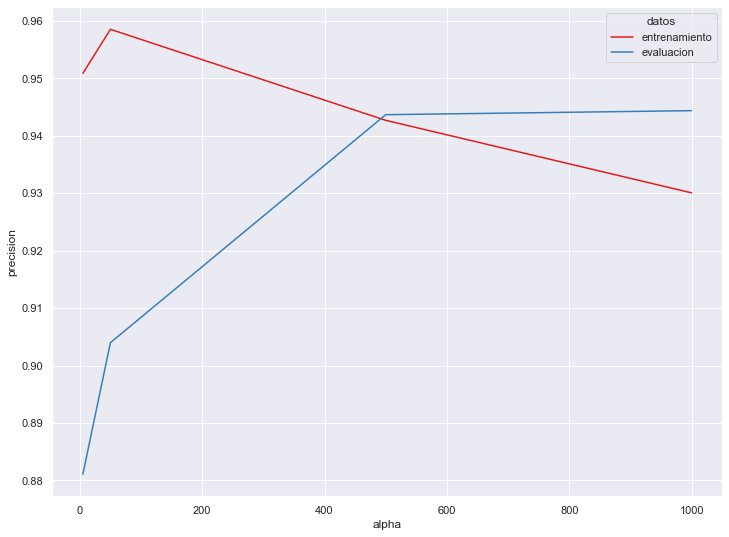

In [39]:
# graficar los resultados.

sns.set(rc={'figure.figsize':(12,9)})

df1 = pd.DataFrame({'alpha':alpha1,
                   'precision':train_prec,
                   'datos':'entrenamiento'})

df2 = pd.DataFrame({'alpha':alpha1,
                   'precision':eval_prec,
                   'datos':'evaluacion'})

df_graph = pd.concat([df1,df2])

sns.lineplot(data=df_graph,
             x='alpha',
             y='precision',
             hue='datos',
             palette="Set1")

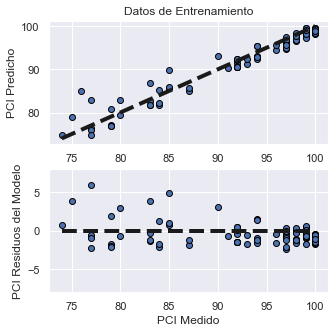

r2 0.9476425278531148
MSE 3.209859718182211


In [40]:


best_mlp1 = MLPRegressor(hidden_layer_sizes = best_params["hidden_layer_sizes"], 
                        activation =best_params["activation"],
                        solver=best_params["solver"], 
                        alpha=500,#best_params["alpha"],#500,
                        learning_rate=best_params["learning_rate"],
                        max_iter= 10000,
                        n_iter_no_change = 1000,
                        early_stopping=True,
                        random_state=42
                       )

best_mlp1.fit(X_train1,y_train1)
predicciones=best_mlp1.predict(X_test1)


#plt.scatter(y_test,pr.predict(X_test))
fig, (ax1,ax2) = plt.subplots(2, figsize=(5, 5))

ax1.scatter(y_train1, best_mlp1.predict(X_train1), edgecolors=(0, 0, 0),label='')
ax1.plot([y_train1.min(), y_train1.max()], [y_train1.min(), y_train1.max()], 'k--', lw=4)
#ax1.set_xlabel('PCI Medido')
ax1.set_ylabel('PCI Predicho')

ax1.set_title('Datos de Entrenamiento')


ax2.scatter(y_train1, best_mlp1.predict(X_train1)-y_train1, edgecolors=(0, 0, 0),label='')
ax2.plot([y_train1.min(), y_train1.max()], [0, 0], 'k--', lw=4)
ax2.set_xlabel('PCI Medido')
ax2.set_ylabel('PCI Residuos del Modelo')
plt.ylim(-8, 8)
#ax2.set_title('Datos de Entrenamiento')
#ax1.plt.text(80,95,'$R^2$=0.9694')
plt.show()
from sklearn.metrics import r2_score
print("r2",r2_score(y_train1,best_mlp1.predict(X_train1)))
print("MSE",mean_squared_error(y_train1,best_mlp1.predict(X_train1)))


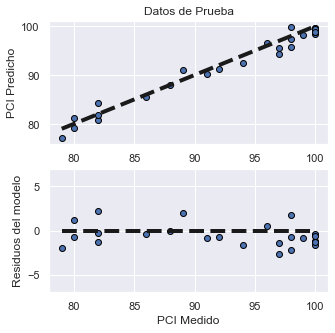

r2 0.9681028436387497
MSE 1.821251075052129


In [41]:

#plt.scatter(y_test,pr.predict(X_test))
fig, (ax1,ax2) = plt.subplots(2, figsize=(5, 5))


ax1.scatter(y_test1, best_mlp1.predict(X_test1), edgecolors=(0, 0, 0),label='')
ax1.plot([y_test1.min(), y_test1.max()], [y_test1.min(), y_test1.max()], 'k--', lw=4)
#ax1.set_xlabel('PCI Medido')
ax1.set_ylabel('PCI Predicho')
ax1.set_title('Datos de Prueba')
#plt.text(80,95,'$R^2$=0.943')

#plt.scatter(y_test,pr.predict(X_test))

ax2.scatter(y_test1, best_mlp1.predict(X_test1)-y_test1, edgecolors=(0, 0, 0),label='')
ax2.plot([y_test1.min(), y_test1.max()], [0, 0], 'k--', lw=4)
ax2.set_xlabel('PCI Medido')
ax2.set_ylabel('Residuos del modelo')
plt.ylim(-7, 7)
#ax1.set_title('Datos de Prueba')
plt.show()
print("r2",r2_score(y_test1,best_mlp1.predict(X_test1)))
print("MSE",mean_squared_error(y_test1,best_mlp1.predict(X_test1)))


## ANALISIS DE DATOS

In [42]:
libro="modelo.xlsx"
datos2=pd.read_excel(libro,sheet_name='Pruebas')
datos_pro=datos2[["Ubicación","Factor Sección Característica","Tipo Pavimento","Área (m2)","NOMENCLATURA","EDAD PAVIMENTO","PCI","DELTA PCI","CARGA ACUMULADA RUEDA SIMPLE","CARGA ACUMULADA RUEDA DOBLE","CARGA ACUMULADA RUEDA DOBLE TANDEM","OPERACIONES EQUIVALENTES","CORREGIR EDAD-TRANSITO",'PCI OBJETIVO']]
datos_pro.head(10)

,Ubicación,Factor Sección Característica,Tipo Pavimento,Área (m2),NOMENCLATURA,EDAD PAVIMENTO,PCI,DELTA PCI,CARGA ACUMULADA RUEDA SIMPLE,CARGA ACUMULADA RUEDA DOBLE,CARGA ACUMULADA RUEDA DOBLE TANDEM,OPERACIONES EQUIVALENTES,CORREGIR EDAD-TRANSITO,PCI OBJETIVO
0,Pista,Sector central de pista,Asfalto,1760,ACPC,7,83,0,0.01424,4.44,4.726226,5879.306174,0,83
1,Pista,Sectores de borde de pista,Asfalto,2240,ACPC,7,84,0,0.01424,4.44,4.726226,5879.306174,0,80
2,Pista,Sector central de pista,Asfalto,31196,ACPC,7,95,0,0.01424,4.44,4.726226,5879.306174,0,90
3,Pista,Sectores de borde de pista,Asfalto,39704,ACPC,7,92,0,0.01424,4.44,4.726226,5879.306174,0,85
4,Pista,Sector central de pista,Asfalto,1760,ACPC,7,100,0,0.01424,4.44,4.726226,5879.306174,0,100
5,Pista,Sectores de borde de pista,Asfalto,2240,ACPC,7,100,0,0.01424,4.44,4.726226,5879.306174,0,100
6,Pista,Sector central de pista,Asfalto,11000,ACPC,3,99,0,0.00712,2.22,2.368609,3471.835361,0,99
7,Pista,Sectores de borde de pista,Asfalto,14000,ACPC,3,100,0,0.00712,2.22,2.368609,3471.835361,0,99
8,Pista,Sector central de pista,Asfalto,7040,AC,3,100,0,0.00712,2.22,2.368609,3471.835361,0,100
9,Pista,Sectores de borde de pista,Asfalto,8960,AC,3,100,0,0.00712,2.22,2.368609,3471.835361,0,100


In [56]:
x_proyecto=datos_pro.drop(['CARGA ACUMULADA RUEDA DOBLE', 'CARGA ACUMULADA RUEDA SIMPLE','CARGA ACUMULADA RUEDA DOBLE TANDEM','CORREGIR EDAD-TRANSITO','PCI OBJETIVO'], axis=1)
x_proyecto['PCI']
x_construccion=datos2['Año Construcción']
x_seccion=datos2['Sección Característica']
x_seccion

d_PR= ["PI-1", "PI-2","PI-3","PI-4","PI-5","PI-6","PI-7","PI-8","PI-9","PI-10","RA-1","RA-2","DE-1","DD-1","DC-1","DB-1"]


In [44]:
x_proyecto=datos_pro.drop(['CARGA ACUMULADA RUEDA DOBLE', 'CARGA ACUMULADA RUEDA SIMPLE','CARGA ACUMULADA RUEDA DOBLE TANDEM','CORREGIR EDAD-TRANSITO','PCI OBJETIVO'], axis=1)

proyecciones = pd.DataFrame([])
proyecciones1 = x_proyecto#pd.DataFrame([])
PCI_t=x_proyecto['PCI']
Edad_p=x_proyecto['EDAD PAVIMENTO']
#Operaciones_eq=x_proyecto['EDAD Pavimento']



for j in range(1,11):
    #x_proyecto['PCI']=PCI_t
    #x_proyecto['EDAD PAVIMENTO']=Edad_p
    x1_proyecto = preprocessor.transform(x_proyecto)
    x1_proyecto = pd.DataFrame(x1_proyecto, columns=labels)
    x1_proyecto=x1_proyecto[sobrevivientes]
    predicciones=best_mlp1.predict(x1_proyecto)
    x_proyecto['PCI']=predicciones
    x_proyecto['EDAD PAVIMENTO']+=1
    opera=33.2613921169767*(((2013+j)**2)-((x_construccion)**2))-132975.883038438*(x_proyecto['EDAD PAVIMENTO'])
    x_proyecto['OPERACIONES EQUIVALENTES']=opera
    #33.2613921169767*(((AJ2)^2)-((M2)^2))-132975.883038438*(AJ2-M2)
    #print(predicciones)
    #print(x_proyecto['EDAD PAVIMENTO'])
    #PCI_t=predicciones
    #Edad_p+=1
    #proyecciones=proyecciones.append({'Ubicación':x_proyecto['Ubicación'],
    #                                  'Factor Sección Característica':x_proyecto['Factor Sección Característica'],
    #                                  'Tipo Pavimento':x_proyecto['Tipo Pavimento'],
    #                                  'Área (m2)':x_proyecto['Área (m2)'],
    #                                  'NOMENCLATURA':x_proyecto['NOMENCLATURA'],
    #                                  'EDAD PAVIMENTO':x_proyecto['EDAD PAVIMENTO'],
    #                                  'PCI':x_proyecto['PCI'],
    #                                  'DELTA PCI':x_proyecto['DELTA PCI'],
    #                                  'OPERACIONES EQUIVALENTES':x_proyecto['OPERACIONES EQUIVALENTES'],
    #                                  'Sección Característica': x_seccion
    #                                 },ignore_index=True)
    if 2013+j==2015:
        x_proyecto['DELTA PCI'][0]=4  #PI-1
        x_proyecto['DELTA PCI'][1]=10 #PI-2
    elif 2013+j==2016:
        #ACTUALES
        x_proyecto['DELTA PCI'][10]=1  #RA-1
        x_proyecto['DELTA PCI'][12]=5  #DE-1
        x_proyecto['DELTA PCI'][14]=3  #DC-1
        x_proyecto['DELTA PCI'][15]=1  #DB-1
        #PASADOS
        x_proyecto['DELTA PCI'][0]=0   #PI-1
        x_proyecto['DELTA PCI'][1]=0   #PI-2
    elif 2013+j==2017:
        x_proyecto['DELTA PCI'][15]=1  #DB-1
        #PASADOS
        x_proyecto['DELTA PCI'][10]=0  #RA-1
        x_proyecto['DELTA PCI'][12]=0  #DE-1
        x_proyecto['DELTA PCI'][14]=0  #DC-1
        x_proyecto['DELTA PCI'][15]=0  #DB-1
    elif 2013+j==2018:
        x_proyecto['DELTA PCI'][2]=2   #PI-3
        x_proyecto['DELTA PCI'][0]=3   #PI-3
         #PASADOS
        x_proyecto['DELTA PCI'][15]=0  #DB-1
    else:
        x_proyecto['DELTA PCI']=0
    x_proyecto1=x_proyecto
    x_proyecto1['Sección Característica']=x_seccion
    x_proyecto1['Año']=2013+j
    proyecciones1= pd.concat([proyecciones1,x_proyecto1], axis=0)
    
    

In [45]:
mask1=proyecciones1['Ubicación']=='Pista'
#mask2=proyecciones1['Factor Sección Característica']=='Sector central de pista'
mask3=proyecciones1['Año']==2016
mask4=proyecciones1['Área (m2)']==1760
proyecciones1[mask1&mask3&mask4].head(10)


,Ubicación,Factor Sección Característica,Tipo Pavimento,Área (m2),NOMENCLATURA,EDAD PAVIMENTO,PCI,DELTA PCI,OPERACIONES EQUIVALENTES,Sección Característica,Año
0,Pista,Sector central de pista,Asfalto,1760,ACPC,10,83.520253,0,8014.36056,PI-1,2016
4,Pista,Sector central de pista,Asfalto,1760,ACPC,10,97.593928,0,8014.36056,PI-5,2016


In [58]:

xgra=datos[["Ubicación",'Sección Característica','AÑO EVALUACIÓN',"Factor Sección Característica","Tipo Pavimento","Área (m2)","NOMENCLATURA","EDAD PAVIMENTO","PCI","DELTA PCI","CARGA ACUMULADA RUEDA SIMPLE","CARGA ACUMULADA RUEDA DOBLE","CARGA ACUMULADA RUEDA DOBLE TANDEM","OPERACIONES EQUIVALENTES","CORREGIR EDAD-TRANSITO"]]
x_medido=xgra[['Sección Característica','AÑO EVALUACIÓN','PCI']]
x_medido = x_medido.rename(columns={"AÑO EVALUACIÓN": "Año"})
x_medido['Dato']="Medido"
x_proyectado=proyecciones1[['Sección Característica','Año','PCI']]
x_proyectado['Dato']="Predicho"
frames = [x_medido, x_proyectado]
datos_analisis = pd.concat(frames)



(0.0, 101.0)

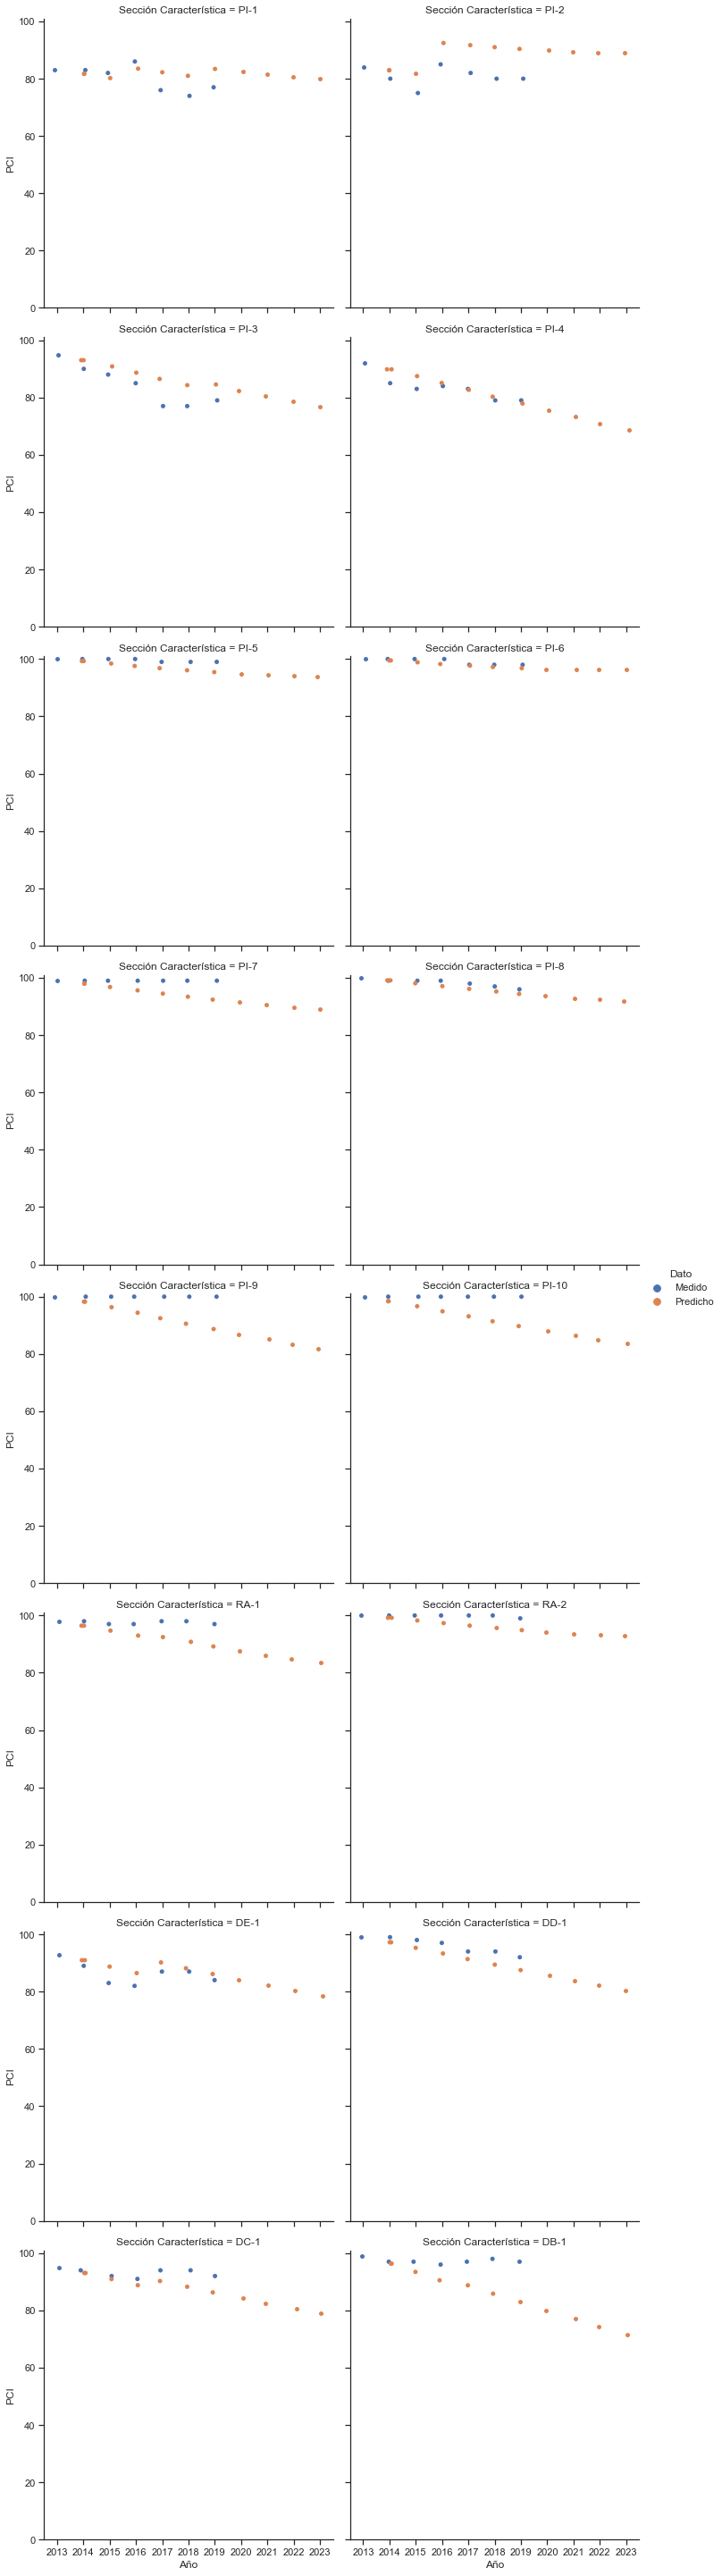

In [61]:
fil=datos_analisis['Sección Característica'].isin(d_PR)
datos_analisis=datos_analisis[fil]
import seaborn as sns
sns.set_theme(style="ticks")
##sns.catplot(x="Año", y="PCI",col="Sección Característica", data=proyecciones1,ax=ax)
#sns.relplot(data=proyecciones1, x="Año", y="PCI",col="Sección Característica",ax=ax1)
#sns.relplot(data=xgra, x="AÑO EVALUACIÓN", y="PCI",col="Sección Característica",ax=ax1)

sns.catplot(x="Año", y="PCI",col="Sección Característica", hue="Dato",data=datos_analisis,kind='strip',col_wrap=2,margin_titles=True)
plt.ylim(0, 101)
#ax.legend(['alpha', 'beta'], facecolor='w')
